# Lecture 21

Lecture notes available [here](https://drive.google.com/file/d/1pvKaajOSwJOdjyxVaxidbAKgsStXpO8O/view?usp=sharing).

## Gradient descent

Consider the least-squares problem of minimizing
$$ \|A\vec y - \vec b\|_2^2. $$

In [16]:
A = randn(8,2)+1.4
b = 20*ones(8,1)


A =

    1.2759    1.8889
    2.8897    2.4347
    2.8090    2.1269
    2.8172    1.0966
    2.0715    1.6939
    0.1925    0.6127
    2.1172    2.2884
    3.0302    0.2529


b =

    20
    20
    20
    20
    20
    20
    20
    20



We are trying to minimize the function 
$$ f(y_1,y_2) = \left\| A \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} - \vec b \right\|_2^2.$$

In [17]:
f = @(y1,y2)  norm(A*[y1;y2]-b)^2


f =

  function_handle with value:

    @(y1,y2)norm(A*[y1;y2]-b)^2



In [18]:
f(30,-10)


ans =

   1.2661e+04



In [19]:
Y1 = linspace(-10,10,100);
Y2 = linspace(-8,16,100);
[Y1,Y2] = meshgrid(Y1,Y2);
Z = Y1;
for i = 1:size(Y1,1)
    for j = 1:size(Y1,2)
        Z(i,j) = f(Y1(i,j),Y2(i,j));
    end
end
low = norm(A*(A\b)-b)^2;
curves = exp(linspace(log(low)-.1,log(low)+5,60));

In [20]:
x = [8;-8]; % initial guess

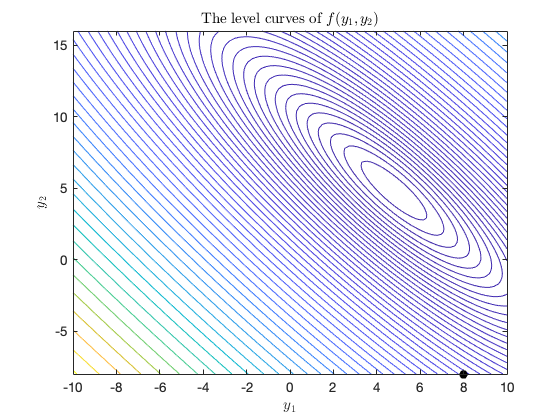

In [21]:
x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on
plot(x1s,x2s,'ko','MarkerFaceColor',[0,0,0])

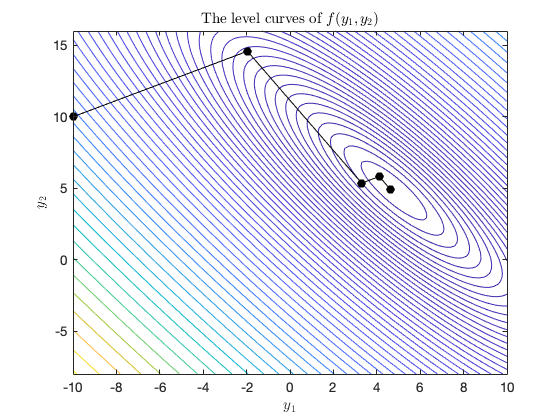

In [24]:
x = [-10;10]; % initial guess

x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on

for i = 1:4
    y = A'*(b - A*x);
    v = A*y;
    h = (y'*y)/(v'*v);
    x = x + h*y;
    x1s = [x1s,x(1)];
    x2s = [x2s,x(2)];
end
plot(x1s,x2s,'ko-','MarkerFaceColor',[0,0,0])

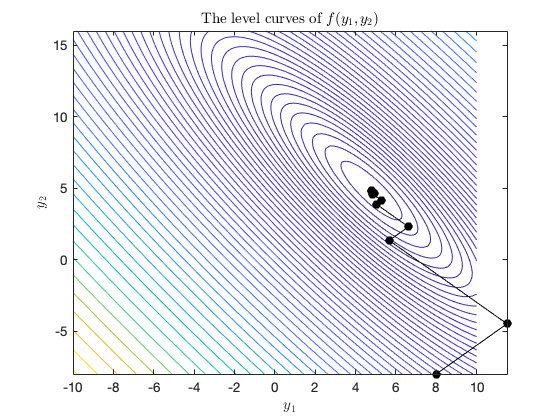

In [36]:
x = [8;-8]; % initial guess

x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on

for i = 1:10
    y = A'*(b - A*x);
    v = A*y;
    h = (y'*y)/(v'*v);
    x = x + h*y;
    x1s = [x1s,x(1)];
    x2s = [x2s,x(2)];
end
plot(x1s,x2s,'ko-','MarkerFaceColor',[0,0,0])

What if we don't choose the optimal step size?

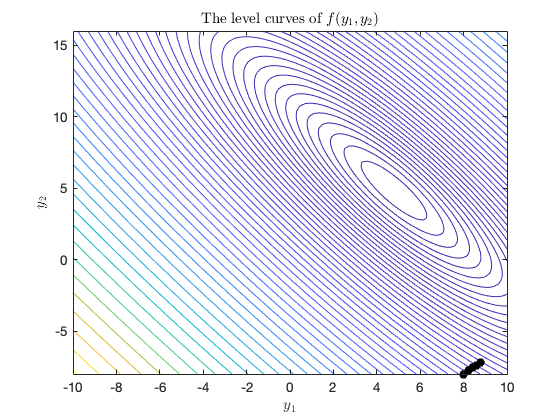

In [26]:
x = [8;-8]; % initial guess

x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on

for i = 1:4
    y = A'*(b - A*x);
    v = A*y;
    h = 0.001;
    x = x + h*y;
    x1s = [x1s,x(1)];
    x2s = [x2s,x(2)];
end
plot(x1s,x2s,'ko-','MarkerFaceColor',[0,0,0])

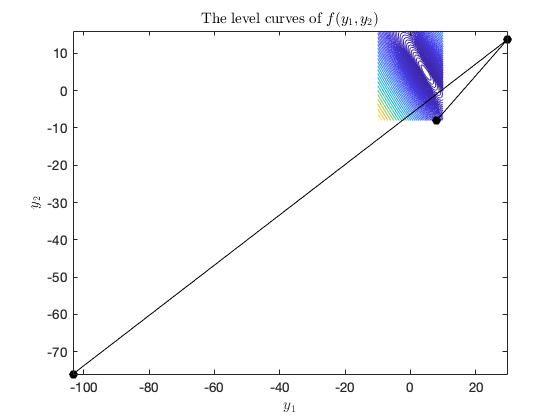

In [28]:
x = [8;-8]; % initial guess

x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on

for i = 1:2
    y = A'*(b - A*x);
    v = A*y;
    h = 0.1;
    x = x + h*y;
    x1s = [x1s,x(1)];
    x2s = [x2s,x(2)];
end
plot(x1s,x2s,'ko-','MarkerFaceColor',[0,0,0])

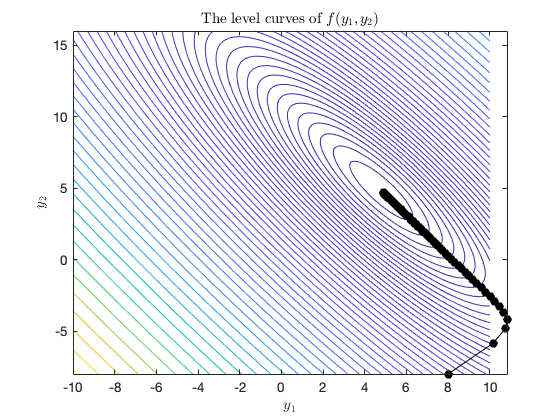

In [34]:
x = [8;-8]; % initial guess

x1s = [x(1)];
x2s = [x(2)];
hold off
contour(Y1,Y2,Z,curves)
title('The level curves of $f(y_1,y_2)$','Interpreter','latex')
xlabel('$y_1$','Interpreter','latex')
ylabel('$y_2$','Interpreter','latex')
hold on

for i = 1:100
    y = A'*(b - A*x);
    v = A*y;
    h = 0.01;
    x = x + h*y;
    x1s = [x1s,x(1)];
    x2s = [x2s,x(2)];
end
plot(x1s,x2s,'ko-','MarkerFaceColor',[0,0,0])

## In higher dimensions

In [38]:
A = randn(18,6)+1.4;
b = 20*ones(18,1);

In [39]:
x = zeros(6,1);

In [40]:
for i = 1:1000
    y = A'*(b - A*x);
    v = A*y;
    h = (y'*y)/(v'*v);
    x = x + h*y
    if norm(h*y) < b
        break
    end
end


x =

    1.9179
    2.0743
    2.4674
    2.9107
    2.2206
    1.9515


x =

    1.1292
    0.4600
    4.6811
    4.8752
    2.6220
   -1.7433


x =

    1.2380
    0.5108
    4.7873
    4.9862
    2.7898
   -1.6478


x =

    1.2656
    0.1920
    4.7127
    4.8092
    3.0845
   -1.7385


x =

    1.3118
    0.2238
    4.7767
    4.8726
    3.1828
   -1.6935


x =

    1.2477
    0.0534
    4.7624
    4.7779
    3.3827
   -1.7896


x =

    1.2711
    0.0757
    4.8100
    4.8222
    3.4476
   -1.7605


x =

    1.1820
   -0.0385
    4.8262
    4.7645
    3.5791
   -1.8332


x =

    1.1960
   -0.0214
    4.8642
    4.7979
    3.6258
   -1.8109


x =

    1.1089
   -0.1045
    4.8905
    4.7560
    3.7154
   -1.8622


x =

    1.1183
   -0.0906
    4.9211
    4.7817
    3.7508
   -1.8442


x =

    1.0419
   -0.1527
    4.9483
    4.7473
    3.8153
   -1.8801


x =

    1.0488
   -0.1414
    4.9731
    4.7673
    3.8428
   -1.8653


x =

    0.9848
   -0.1884
    4.9979
    4.7375
 


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
    4.1803
   -1.8961


x =

    0.7342
   -0.3032
    5.2386
    4.6380
 

In [41]:
i


i =

   209

